In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import visualize_correlation as VizCorr
import cleaner
import preprocesser
import seaborn as sns

In [2]:
# Feature Engineering:
# For our target variable, we chose to combine the promotion columns into one feature in which
# 0 represents if the customer did not accept the promotion, 1-6 represents if the customer did 
# accept the promotion on the respective campaign.

marketing_data = pd.read_csv("marketing_campaign.csv", delimiter="\t")
marketing_data = marketing_data.dropna()

marketing_data = cleaner.clean(marketing_data)

campaign_accepted = np.repeat(0, len(marketing_data))
campaign_accepted[marketing_data["Response"] == 1] = 6

for i in range(5,0,-1):
    column_name = "AcceptedCmp" + str(i)
    campaign_accepted[marketing_data[column_name] == 1] = i

marketing_data.drop(columns=["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"], inplace=True)
marketing_data["CampaignAccepted"] = campaign_accepted

c:\Users\volle\Documents\College\Courses\Senior\Introduction to Data Science\CaseStudy_4\cleaner.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = (data[col] - _min) / (_max - _min)


Conjecture: The amount of money spent on specific products will link to the promotion that they acccept.

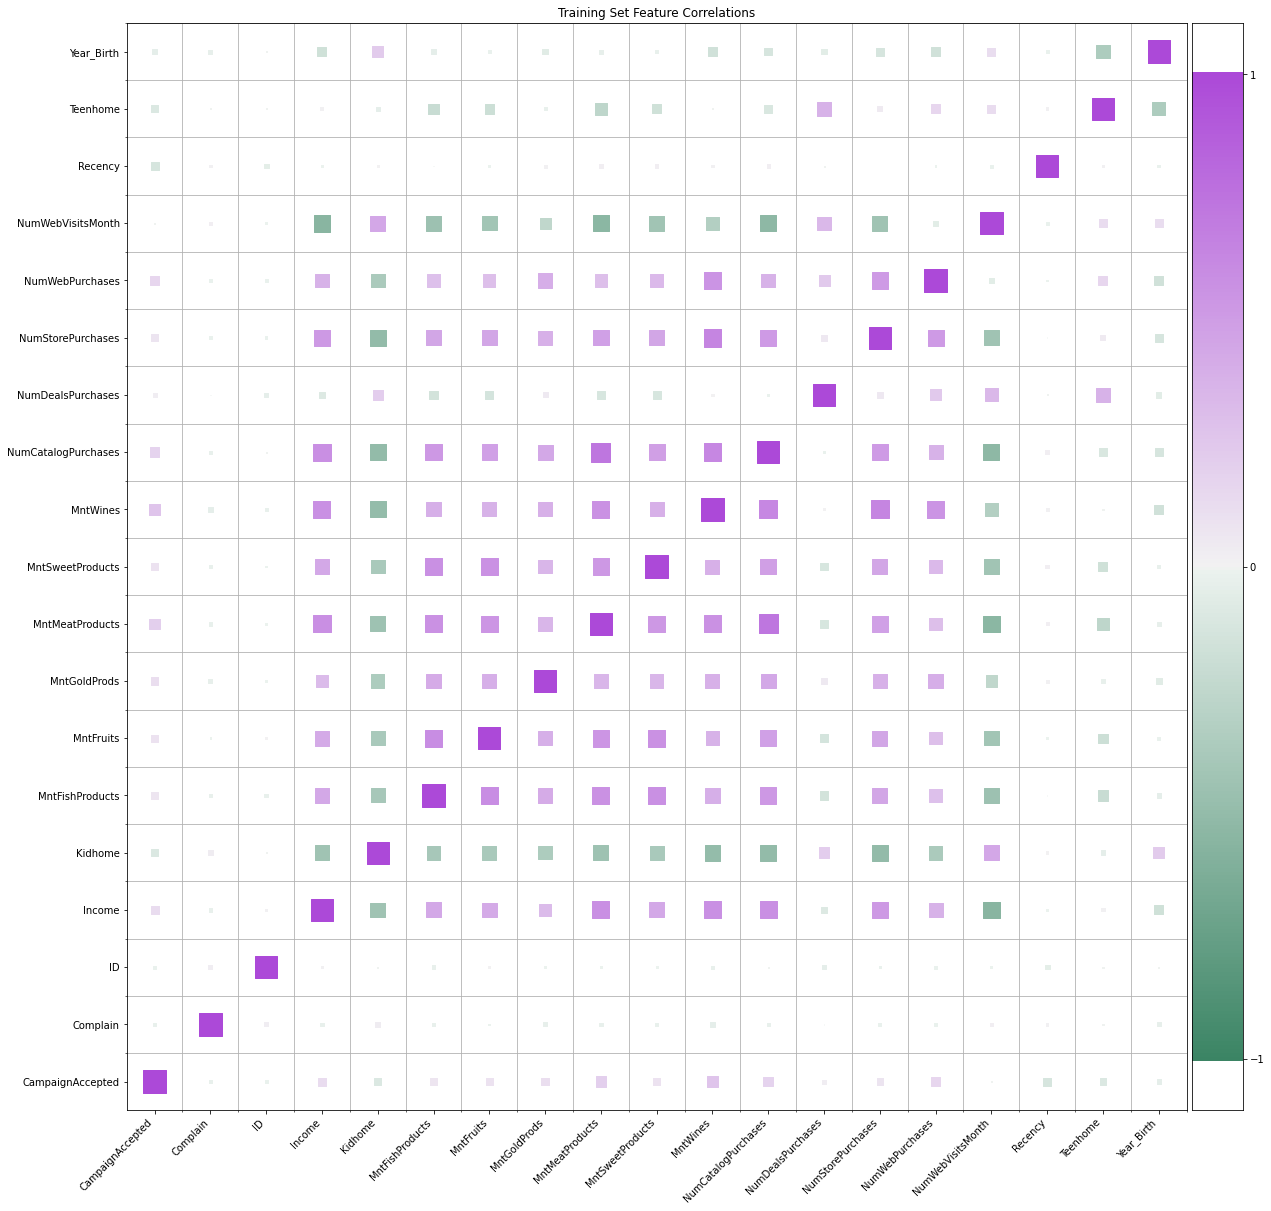

In [3]:
VizCorr.get_correlation_matrix(marketing_data, "Training Set Feature Correlations")

The above visualization shows the correlation between the various features and our target variable. As shown above, the spending values appear to have the highest correlation to our target variable. Specifically, there is a high correlation between MntMeatProducts and MntWines and our target variable. We will dive further into this relationship below.

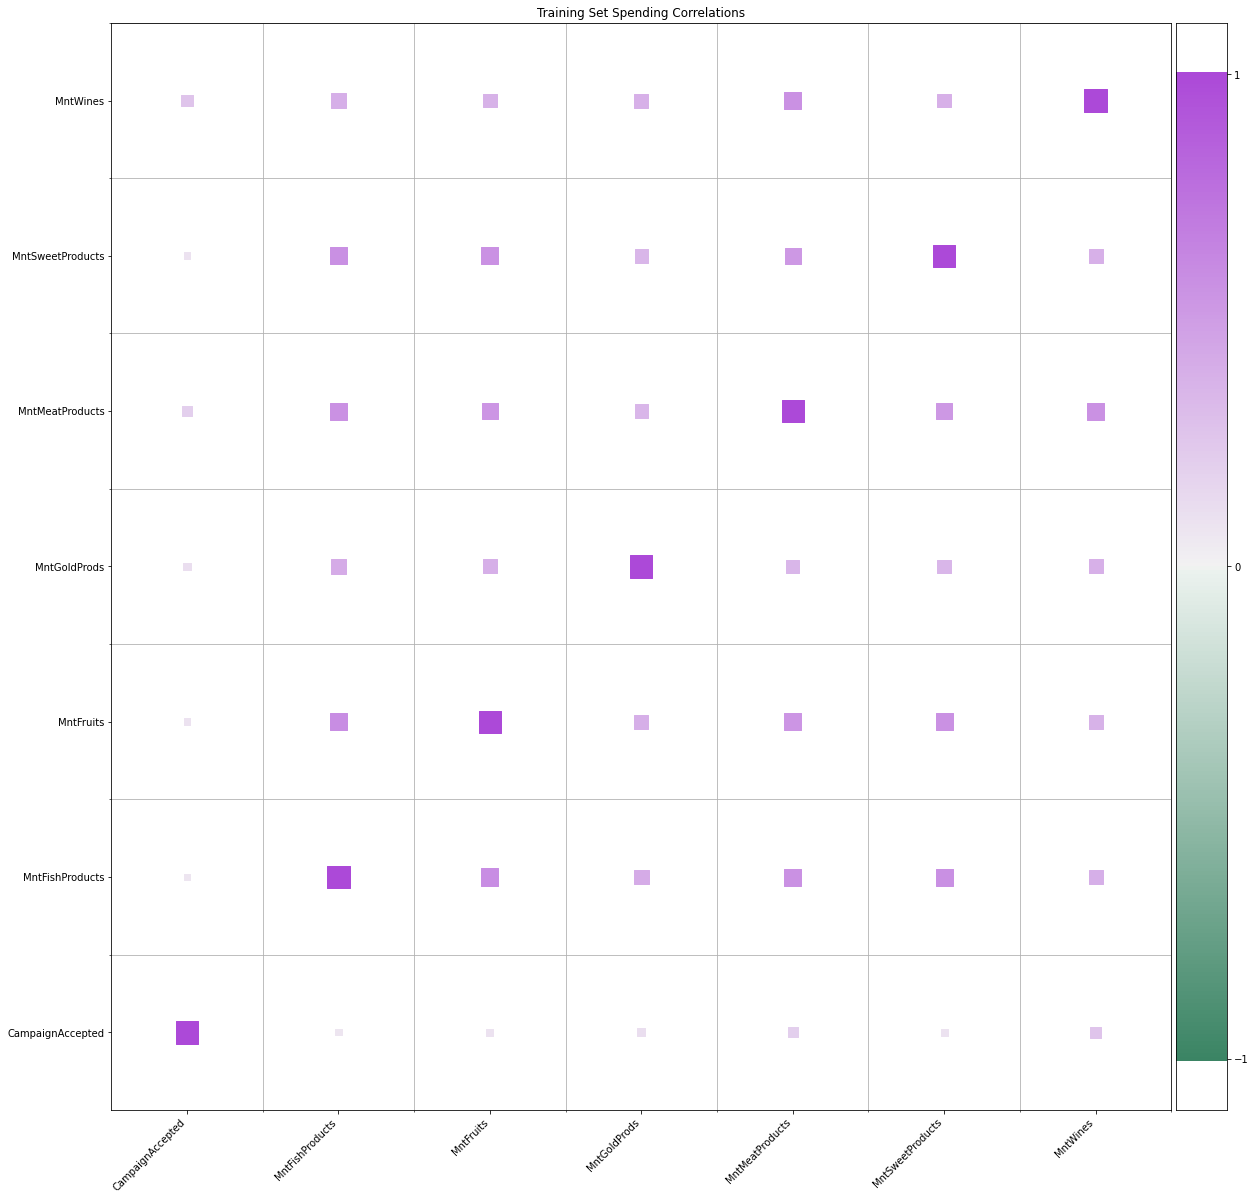

In [4]:
spending_vals_and_target = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "CampaignAccepted"]

VizCorr.get_correlation_matrix(marketing_data[spending_vals_and_target], "Training Set Spending Correlations")

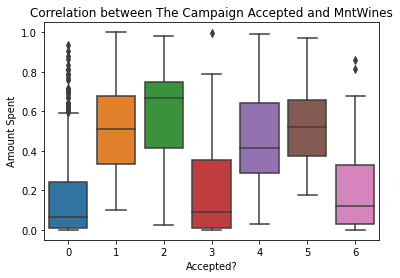

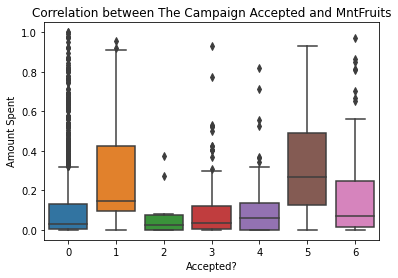

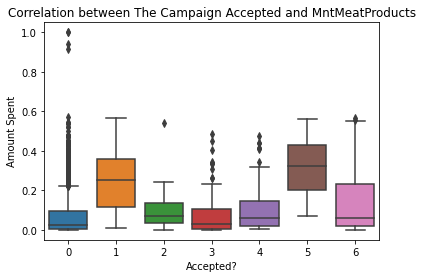

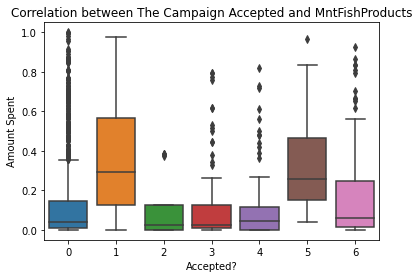

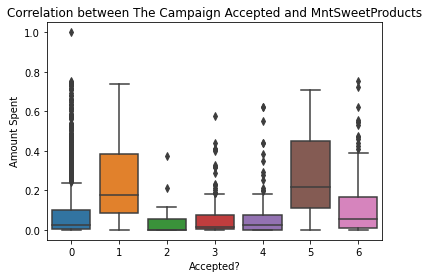

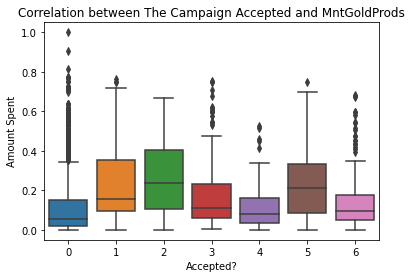

In [5]:
# Visualizes the spending distribution in the various spending areas based on the campaign accepted
# The goal here is to notice if there are any trends that help to differentiate the different campaigns by the customer spending

spending_vals = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

for col in spending_vals:
    sns.boxplot(x=marketing_data["CampaignAccepted"], y=marketing_data[col], data=marketing_data)
    title = "Correlation between The Campaign Accepted and " + col
    plt.title(title)
    plt.ylabel("Amount Spent")
    plt.xlabel("Accepted?")
    plt.savefig(title+".png")
    plt.show()
    plt.close()

As shown above, for a majority of the feature columns, the distributions for campaigns 2, 3, 4, 6, and no campaign are similar. This indicates that there is not a strong way to differentiate these different campaigns using our spending features. However, the spending amounts for customers accepting the first and fifth campaign appear to be much higher than the other campaigns. This indicates that spending would be able to help us identify these campaigns. However, the first and the fifth campaign are on opposite sides of the advertising timeline (i.e. the first campaign is at the beginning and the fifth campaign is at the end). Thus, this information is not helpful in allowing the sales team to figure out which demographics should have less time spent advertising as the campaiagn goes on.

In addition, these graphs do show a general upwards trend in average spending amongst those who accepted a campaign vs. those who did not. We will further explore this below.

In [6]:
# Changes target variable to be accepted or not accepted (binary)
accepted_campaign = marketing_data.copy(deep=True)
campaign = accepted_campaign.copy(deep=True)["CampaignAccepted"]
campaign[campaign != 0] = 1
accepted_campaign["CampaignAccepted"] = campaign

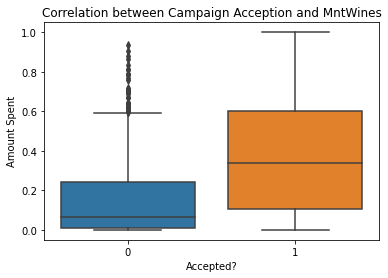

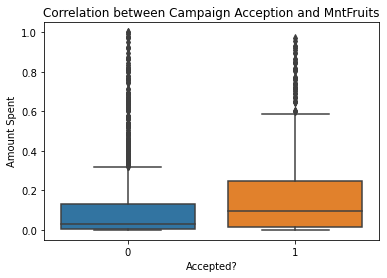

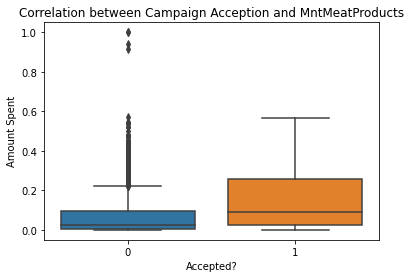

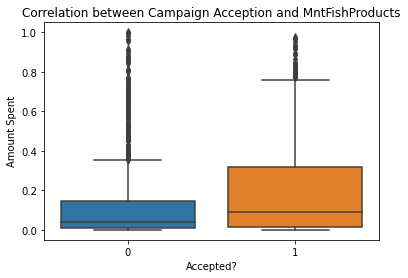

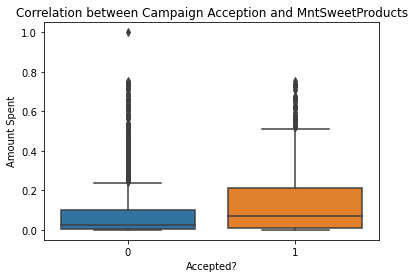

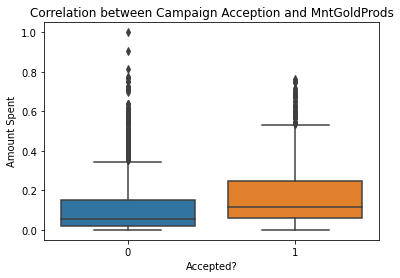

In [7]:
# Visualizes the spending distributions in the various spending areas based on if the customer accepted the campaign or not
for col in spending_vals:
    sns.boxplot(x=accepted_campaign["CampaignAccepted"], y=accepted_campaign[col], data=accepted_campaign)
    title = "Correlation between Campaign Acception and " + col
    plt.title(title)
    plt.ylabel("Amount Spent")
    plt.xlabel("Accepted?")
    plt.savefig(title+".png")
    plt.show()
    plt.close()

As shown in the figures above, the general average amount of spending for customers who accept the campaign is higher than those who do not accept the campaign. However, these is a noticable difference in the amount of wine spent in customers who accept the campaign. These figures show the potential for a model that predicts whether or not a customer accepts a campaign.

Since the average spending amounts are on average higher for customers who accept the campaign, it may be helpful to analyze the relationship between whether or not the customer accepts the campaign and their **total** spending amongst all of the columns.

In [8]:
# Here, we consolodate all of the spending features into one "Total Spending" column
marketing_data = preprocesser.create_spending(marketing_data)
accepted_campaign = preprocesser.create_spending(accepted_campaign)

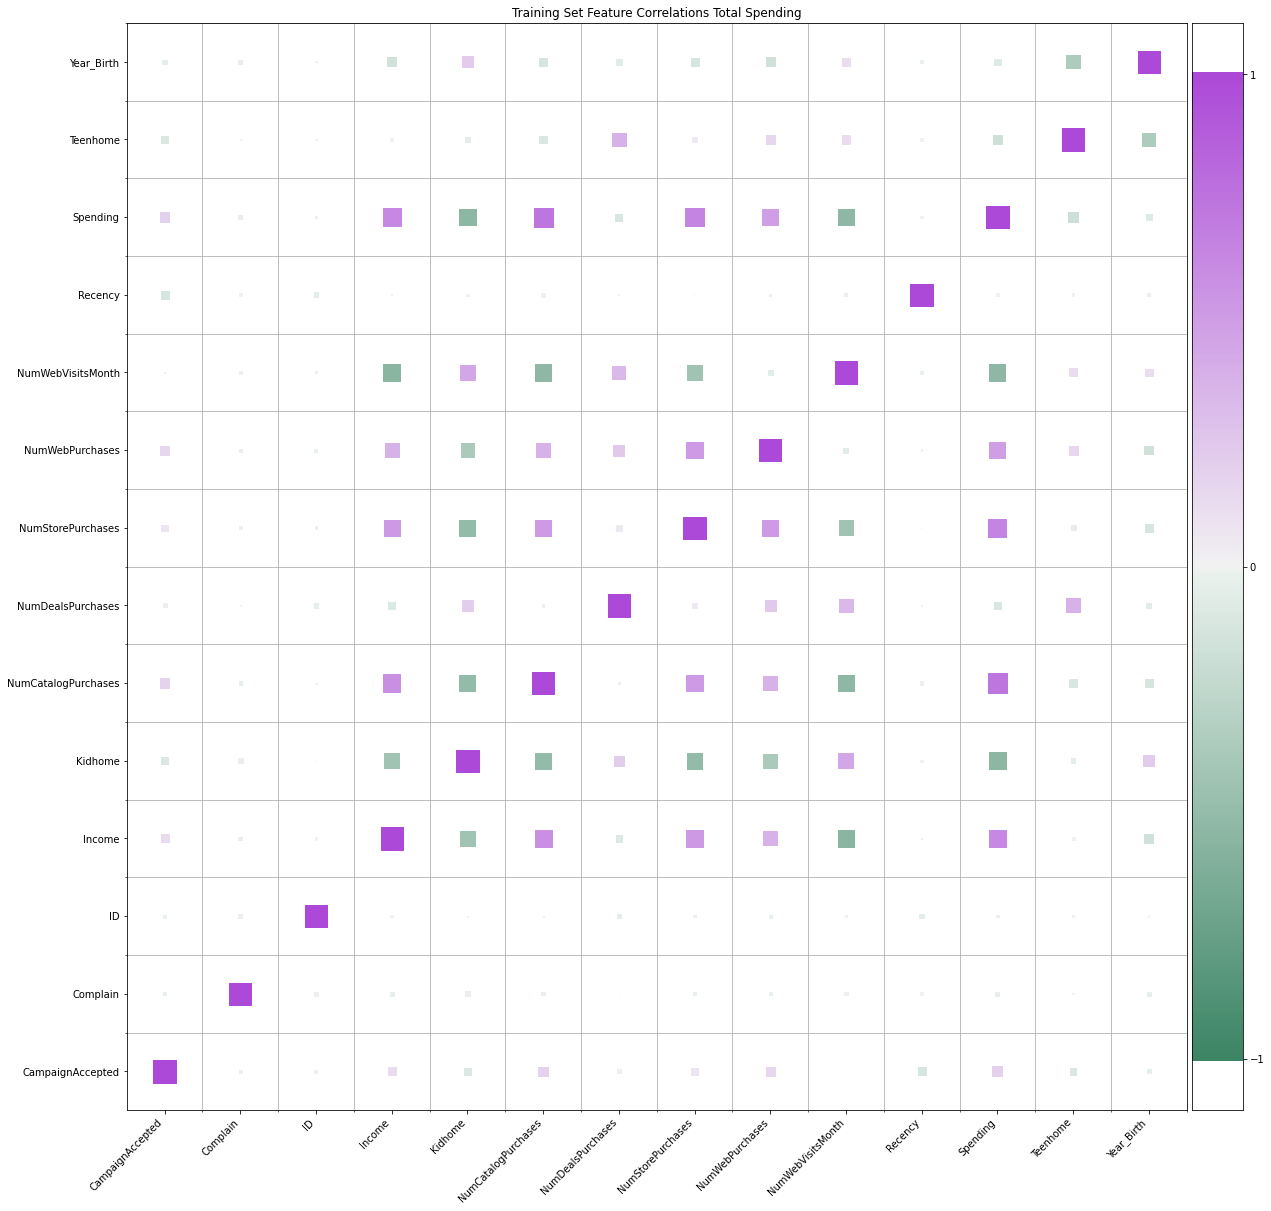

In [9]:
VizCorr.get_correlation_matrix(marketing_data, "Training Set Feature Correlations Total Spending")

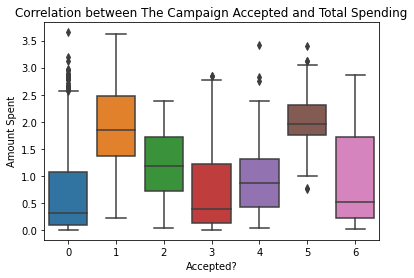

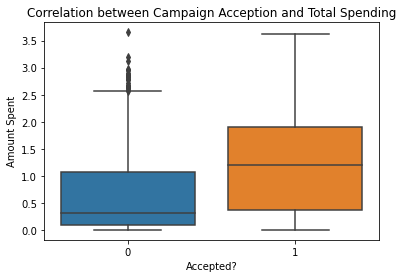

In [10]:
# Visualizes the distribution of total spending for each campaign accepted
sns.boxplot(x=marketing_data["CampaignAccepted"], y=marketing_data["Spending"], data=marketing_data)
plt.title("Correlation between The Campaign Accepted and Total Spending")
plt.ylabel("Amount Spent")
plt.xlabel("Accepted?")
plt.savefig("Correlation between The Campaign Accepted and Total Spending.png")
plt.show()
plt.close()

# Visualizes the distribution of total spending based on whether the customer accepts the campaign or not
sns.boxplot(x=accepted_campaign["CampaignAccepted"], y=accepted_campaign["Spending"], data=accepted_campaign)
title = "Correlation between Campaign Acception and Total Spending"
plt.title(title)
plt.ylabel("Amount Spent")
plt.xlabel("Accepted?")
plt.savefig(title+".png")
plt.show()
plt.close()

As previously hypothesized, the above figures show a strong distinction between the total spending of customer who do and do not accept the campaign. This indicates that total spending is an important feature in our proposed model to predict whether or not a customer accepts a campaign. However, although there is a strong distinction between a majority of the classes, the first figure shows a strong relationship between total spending for customers who accept the 1st or 5th campaign. As previously mentioned, this inhibits our model from predicting the specific campaign accepted since these two campaigns are very similar. In addition, since these campaigns are on opposite sides of the advertising timeline, it is not helpful to predict the first and fifth campaign the same. Thus, we should pursue developing an accurate model for predicting whether or not a customer accepts the campaign, rather than the specific campaign.


Solution: We accept our conjecture that the spending on wines and the total spending can be used to identify customers who accept the first and fifth campaign. We also conclude that the total spending can be used to predict if the customer accepts the campaign.